# ML - scikit learn

# Submitted by:
<br>Prottoy Kumar Prodhan Joy
<br>Department of Statistics 
<br>University of Chittagong, Chittagong, Bangladesh

#### Objectives:
- Label Encoding, One-hot Encoding
- Data Transformation (StandardScaler or MinMaxScaler)
- Grid Search and Cross-Validation
- Decision Tree Classification
- Confusion Matrix
- ROC-AUC 

**Dataset Source**

 https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

**Import required Libraries**

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score


In [3]:
# read the csv file 
df=pd.read_csv('churn.csv')
# check first 5 rows
display(df.head(5))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [4]:
# find the number of rows and columns present in the dataframe
df.shape

(3333, 21)

In [5]:
# check the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

So, there are 21 columns. Among them Churn is the target variable and others are feature variables.

In [6]:
df.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [7]:
df=df.drop(['State', 'Area_Code', 'Phone'],axis=1)

In [8]:
df.shape

(3333, 18)

**Perform Label encoding**

In [9]:
df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


In this case, label encoding is better. Because 

**Separating the features and target variable**

In [10]:
# Here churn is the target variable
# And, rest are feature variables
X = df.drop('Churn', axis=1)
y = df[['Churn']]

print(X.shape, y.shape)

(3333, 17) (3333, 1)


In [11]:
# check first 5 rows of the 'X' dataframe
display(X.head(5))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,28.34,122,12.61,121,8.41,3,2.73


In [12]:
X.shape

(3333, 17)

In [13]:
# check random 5 rows of the 'y' dataframe
display(y.sample(5))

,Churn
732,0
750,0
2675,0
2431,0
90,0


**Data Transformation**

In [14]:
X.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,0.276628,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,0.447398,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,1.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000


In [15]:
# normalize the feature columns
scaler = MinMaxScaler()

for col in X.columns:
    X[col] = scaler.fit_transform(X[[col]])

display(X.sample(10))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
1883,0.574380,0.549020,0.447834,0.474017,0.433835,0.555,0.111111,0.0,1.0,0.466667,0.447854,0.570588,0.473957,0.429577,0.433951,0.45,0.555556
2886,0.347107,0.000000,0.411631,0.727523,0.436256,0.495,0.111111,0.0,0.0,0.533333,0.411636,0.617647,0.727596,0.429577,0.436342,0.15,0.494444
664,0.603306,0.000000,0.585234,0.458345,0.584723,0.390,0.111111,0.0,0.0,0.575758,0.585178,0.752941,0.458428,0.359155,0.585176,0.20,0.390741
1022,0.632231,0.000000,0.475770,0.425900,0.447015,0.360,0.000000,0.0,0.0,0.600000,0.475687,0.570588,0.426076,0.394366,0.447101,0.25,0.359259
665,0.458678,0.431373,0.518244,0.627165,0.644164,0.460,0.222222,0.0,1.0,0.666667,0.518276,0.723529,0.627305,0.760563,0.644351,0.20,0.459259
1497,0.466942,0.000000,0.541049,0.406104,0.402098,0.530,0.111111,0.0,0.0,0.612121,0.541080,0.470588,0.406017,0.619718,0.402271,0.25,0.529630
3270,0.243802,0.000000,0.513968,0.571900,0.424960,0.640,0.222222,0.0,0.0,0.406061,0.513917,0.400000,0.571983,0.478873,0.424985,0.30,0.640741
2643,0.301653,0.000000,0.355758,0.365686,0.368747,0.530,0.333333,0.0,0.0,0.690909,0.355801,0.711765,0.365901,0.366197,0.368799,0.35,0.529630
3037,0.462810,0.000000,0.452965,0.667583,0.604088,0.325,0.000000,0.0,0.0,0.830303,0.452884,0.641176,0.667745,0.450704,0.604304,0.20,0.325926
2031,0.533058,0.000000,0.396522,0.676382,0.494890,0.570,0.555556,0.0,0.0,0.436364,0.396546,0.658824,0.676480,0.619718,0.494919,0.45,0.570370


In [16]:
X.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.413491,0.158804,0.512472,0.552599,0.477870,0.511865,0.173651,0.096910,0.276628,0.608701,0.512446,0.588908,0.552687,0.472590,0.478143,0.223972,0.511960
std,0.164554,0.268399,0.155266,0.139439,0.136024,0.139592,0.146166,0.295879,0.447398,0.121631,0.155255,0.117192,0.139459,0.137807,0.136035,0.123061,0.139588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.301653,0.000000,0.409635,0.458070,0.386767,0.425000,0.111111,0.000000,0.000000,0.527273,0.409624,0.511765,0.458104,0.380282,0.387328,0.150000,0.425926
50%,0.413223,0.000000,0.511403,0.553753,0.478752,0.515000,0.111111,0.000000,0.000000,0.612121,0.511402,0.588235,0.553866,0.471831,0.478781,0.200000,0.514815
75%,0.520661,0.392157,0.616876,0.646962,0.570468,0.605000,0.222222,0.000000,1.000000,0.690909,0.616868,0.670588,0.647040,0.563380,0.570831,0.300000,0.605556
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It is not necessary to standardize or normalize data for tree-based machine learning models. But Data Transformation improves model performance.

**Split the dataset intro train and test set**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666, 1) (667, 1)


**Decision Tree classifier, no grid search**

In [18]:
model_DT = DecisionTreeClassifier()
model_DT = model_DT.fit(X_train, y_train)

**Tree Diagram**

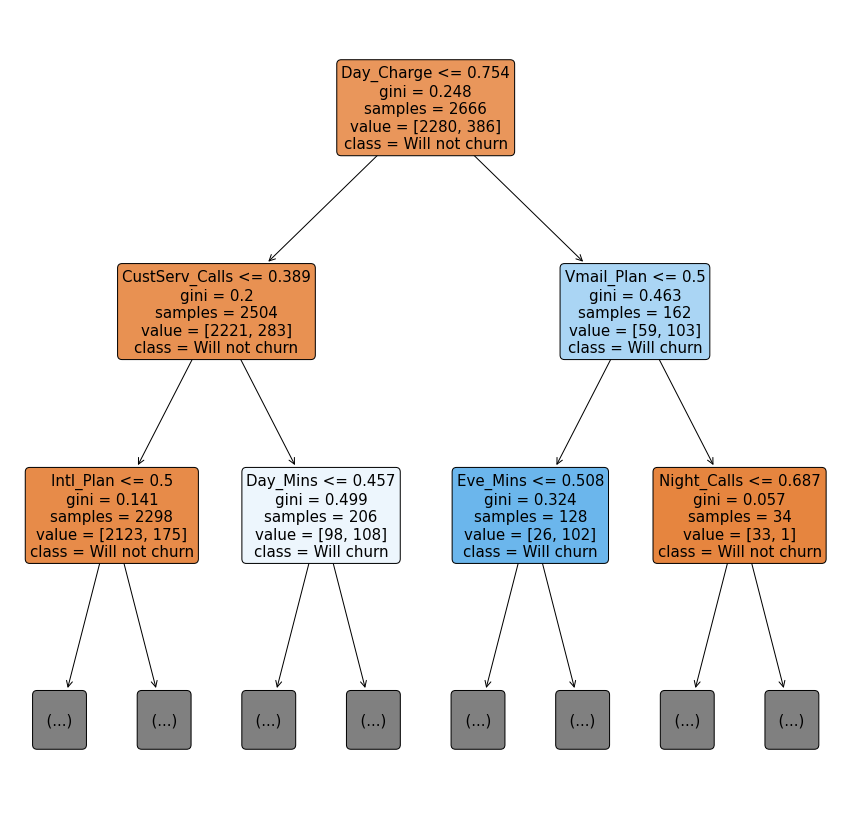

In [19]:
plt.figure(figsize = (15, 15))
plot_tree(model_DT, filled=True, rounded=True, class_names = ["Will not churn", "Will churn"], feature_names = X.columns, max_depth=2,
          fontsize=15)

plt.show()

**Model Performance Evaluation**

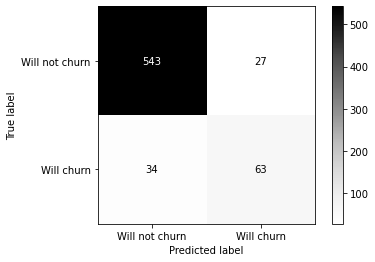

In [20]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test, 
                      display_labels=["Will not churn", "Will churn"],
                      cmap='Greys')
plt.show()

In [21]:
y_pred_DT = model_DT.predict(X_test)

Accuracy:  0.9085457271364318
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       570
           1       0.70      0.65      0.67        97

    accuracy                           0.91       667
   macro avg       0.82      0.80      0.81       667
weighted avg       0.91      0.91      0.91       667



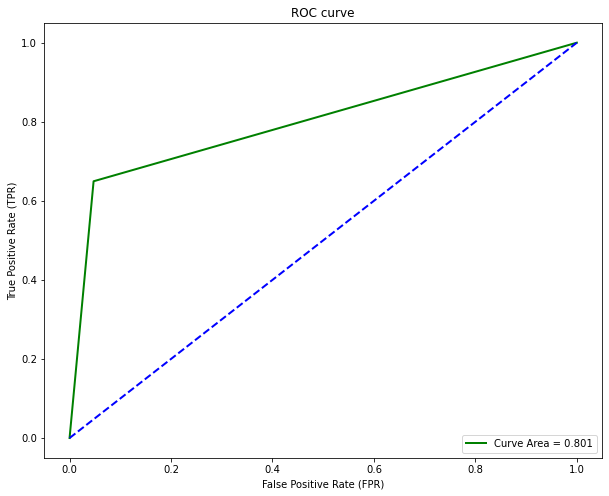

In [22]:
print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

fpr, tpr, thr = roc_curve(y_test, model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred_DT)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

In [23]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7,None]}



model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                          param_grid=parameters,
                           scoring="precision",
                           cv=5,
                           n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

In [24]:
y_pred = grid_result.predict(X_test)

**Best hyperparameters in the grid search**

In [25]:
grid_result.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [26]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,gini,6,0.887097,0.918033,0.907692,0.867647,0.865672,0.889228,0.020956,1
10,entropy,7,0.915254,0.898305,0.887324,0.859155,0.840580,0.880124,0.026907,2
4,gini,7,0.879310,0.875000,0.887324,0.867647,0.833333,0.868523,0.018713,3
1,gini,4,0.877551,0.901961,0.893617,0.844828,0.800000,0.863591,0.037322,4
7,entropy,4,0.877551,0.839286,0.893617,0.901961,0.800000,0.862483,0.037940,5
2,gini,5,0.836066,0.840580,0.901639,0.893939,0.823529,0.859151,0.032132,6
9,entropy,6,0.887097,0.808824,0.876712,0.837838,0.840580,0.850210,0.028361,7
8,entropy,5,0.820896,0.823529,0.869565,0.842857,0.846154,0.840600,0.017633,8
0,gini,3,0.852941,0.886364,0.825000,0.795455,0.809524,0.833857,0.032454,9
6,entropy,3,0.852941,0.583333,0.825000,0.909091,0.809524,0.795978,0.111609,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


**Model performance evaluation with the best found model in grid search and cross-validation**

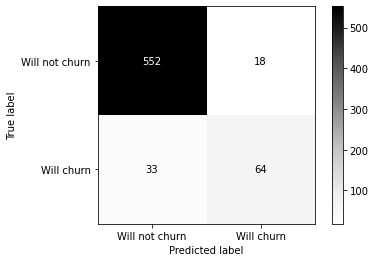

In [27]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Will not churn", "Will churn"],
                      cmap='Greys')
plt.show()

In [28]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

confusion_matrix: 
 [[552  18]
 [ 33  64]]
Accuracy:  0.9235382308845578
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       570
           1       0.78      0.66      0.72        97

    accuracy                           0.92       667
   macro avg       0.86      0.81      0.84       667
weighted avg       0.92      0.92      0.92       667



**Precision, Recall/Sensitivity/True Positive Rate, F1 score**

**precision:**Precision can be seen as a measure of a classifier’s exactness. For each class, it is defined as the ratio of true positives to the sum of true and false positives.**

Precision attempts to answer the question: 

What proportion of positive identifications was actually correct?

Precision .78 means, when it predicts a customer will churn, it is correct 78% of the time.

**recall:** Recall is a measure of the classifier’s completeness; the ability of a classifier to correctly find all positive instances. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives.

Recall attempts to answer the question:

What proportion of actual positive was identified correctly?

Recall .66 means, 66% of the customers who will churn are identified correctly.

**f1 score:** The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

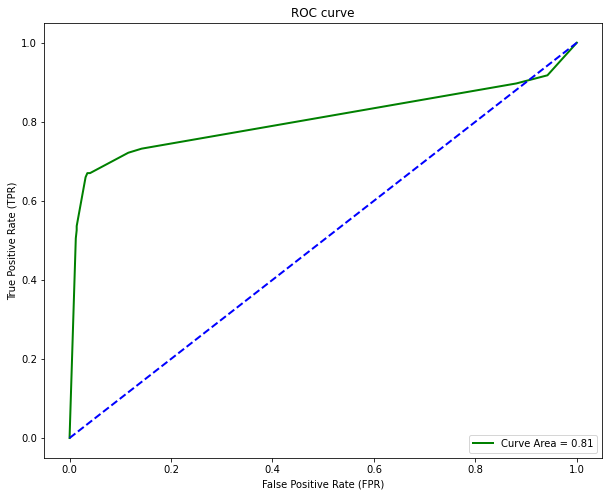

In [29]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()